<a href="https://colab.research.google.com/github/Reubenpt123/DAV/blob/main/Neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
#from imblearn.base import BaseSampler
#from imblearn.over_sampling import (SMOTE, RandomOverSampler)
#import imblearn
#from imblearn.over_sampling import SMOTE

In [2]:
cd d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy


In [36]:
df = pd.read_csv('clean_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')

phase_0 = df[df['phase'] == 0]
X = phase_0.drop(['fluors', 'phase'], axis = 1)
y = phase_0['fluors']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [25]:
model = Sequential()
model.add(Dense(units = 1000, activation = "relu", input_shape = (5, )))
model.add(Dropout(0.1))
model.add(Dense(units = 500, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 500, activation = "relu"))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "relu"))
model.summary()
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['mean_squared_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              6000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 100)               50100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0

In [26]:
no_epochs = 10
history = model.fit(X_train, y_train, batch_size = 30, epochs = no_epochs, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 1)

Epoch 1/10
448/448 [==============================] - 7s 14ms/step - loss: 1.7249 - mean_squared_error: 1.7249 - val_loss: 1.3810 - val_mean_squared_error: 1.3810
Epoch 2/10
448/448 [==============================] - 5s 12ms/step - loss: 1.3564 - mean_squared_error: 1.3564 - val_loss: 1.1864 - val_mean_squared_error: 1.1864
Epoch 3/10
448/448 [==============================] - 5s 11ms/step - loss: 1.2917 - mean_squared_error: 1.2917 - val_loss: 1.1147 - val_mean_squared_error: 1.1147
Epoch 4/10
448/448 [==============================] - 5s 11ms/step - loss: 1.2397 - mean_squared_error: 1.2397 - val_loss: 1.2474 - val_mean_squared_error: 1.2474
Epoch 5/10
448/448 [==============================] - 5s 11ms/step - loss: 1.2064 - mean_squared_error: 1.2064 - val_loss: 1.0687 - val_mean_squared_error: 1.0687
Epoch 6/10
448/448 [==============================] - 5s 11ms/step - loss: 1.1518 - mean_squared_error: 1.1518 - val_loss: 0.9581 - val_mean_squared_error: 0.9581
Epoch 7/10
448/448 [==

In [37]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test))) 

420/420 [==============================] - 1s 2ms/step
1.0166061627735288
180/180 [==============================] - 0s 2ms/step
0.986835466293708


In [126]:
model.save('final_model.h5')

In [38]:
#model = keras.models.load_model('model.h5')
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))
y_pred = model.predict(X)
print(np.sqrt(mean_squared_error(y, y_pred)))

420/420 [==============================] - 1s 2ms/step
1.0166061627735288
180/180 [==============================] - 0s 2ms/step
0.986835466293708
599/599 [==============================] - 1s 2ms/step
1.0077673013965192


C:\Users\709583\AppData\Local\Temp\ipykernel_1732\2378577069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_0['y_pred'] = y_pred
C:\Users\709583\AppData\Local\Temp\ipykernel_1732\2378577069.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


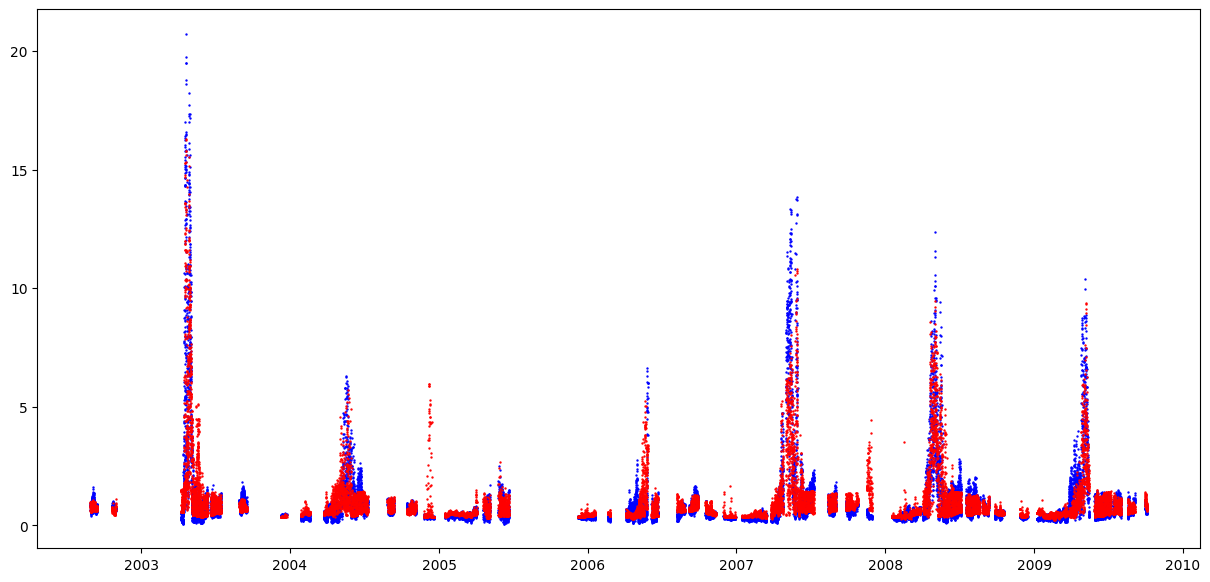

In [40]:
phase_0['y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_0.index, phase_0['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_0.index, phase_0['y_pred'], s = 0.5, color = 'red')
fig.savefig('predictions.png')
fig.show()

C:\Users\709583\AppData\Local\Temp\ipykernel_1732\978024357.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


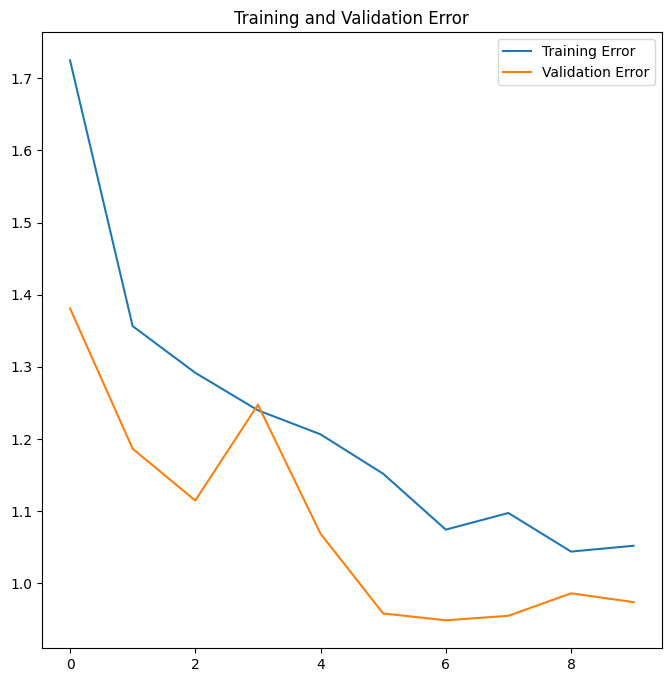

In [41]:
epochs_range = range(no_epochs)
train_err = history.history['mean_squared_error']
validation_err = history.history['val_mean_squared_error']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(epochs_range, train_err, label = 'Training Error')
ax.plot(epochs_range, validation_err, label = 'Validation Error')
ax.legend(loc = 'upper right')
ax.set_title('Training and Validation Error')
fig.show()

C:\Users\709583\AppData\Local\Temp\ipykernel_2492\1914953513.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


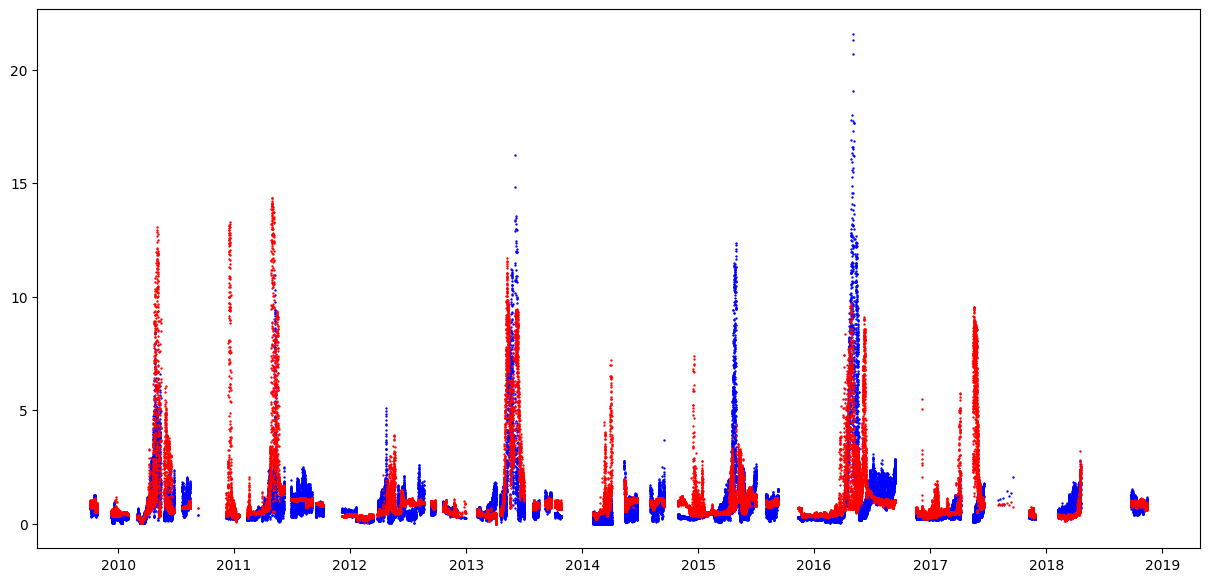

In [127]:
df3['y_1_pred'] = y_1_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(df3.index, df3['roll_fluors'], s = 0.5, color = 'blue')
ax.scatter(df3.index, df3['y_1_pred'], s = 0.5, color = 'red')
fig.savefig('future_predictions.png')
fig.show()